In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.__version__

'1.3.5'

In [4]:
matplotlib.__version__

'3.2.2'

In [5]:
sns.__version__

'0.11.2'

In [6]:
filepath = "drive/My Drive/Colab Notebooks/dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(filepath)

In [7]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Scatter Plot: Mencari hubungan antara masa berlangganan dan biaya bulanan

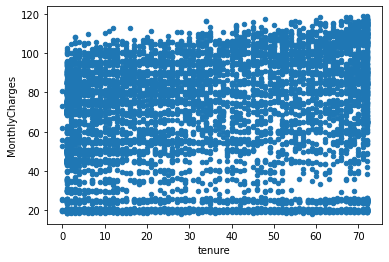

In [8]:
df.plot(x="tenure", y="MonthlyCharges", kind="scatter")

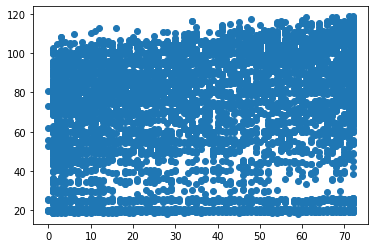

In [9]:
plt.scatter(x="tenure", y="MonthlyCharges", data=df)

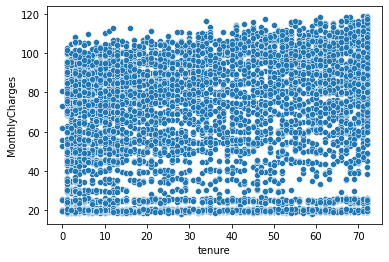

In [10]:
sns.scatterplot(x="tenure", y="MonthlyCharges", data=df)

Histogram: Mencari distribusi dari masa berlangganan

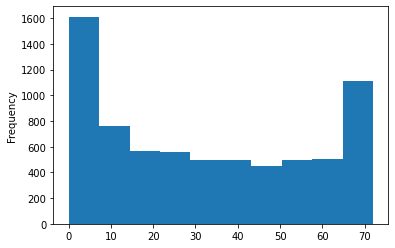

In [11]:
df['tenure'].plot(kind="hist")

(array([1612.,  759.,  570.,  556.,  495.,  494.,  452.,  495.,  501.,
        1109.]),
 array([ 0. ,  7.2, 14.4, 21.6, 28.8, 36. , 43.2, 50.4, 57.6, 64.8, 72. ]),
 <a list of 10 Patch objects>)

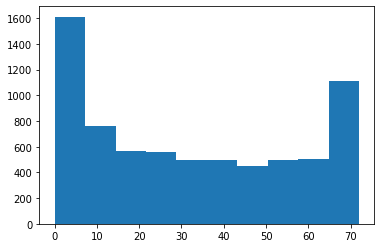

In [12]:
plt.hist(x="tenure", data=df)

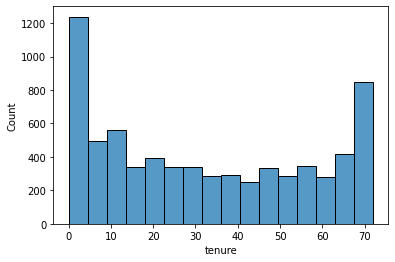

In [13]:
sns.histplot(x="tenure", data=df)

Boxplot: Mencari distribusi dari masa berlangganan

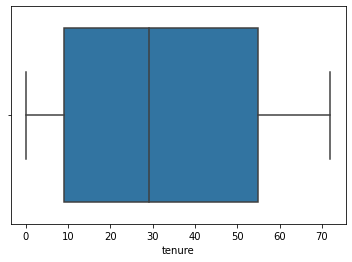

In [14]:
sns.boxplot(x="tenure", data=df)

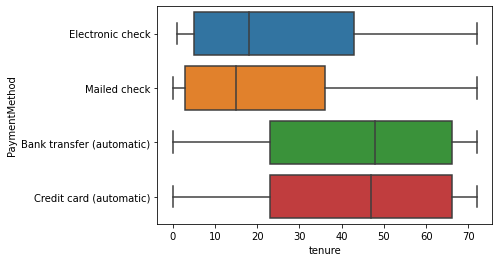

In [15]:
sns.boxplot(x="tenure", y="PaymentMethod", data=df)

Barplot: Mencari rata-rata biaya bulanan untuk setiap metode pembayaran

In [16]:
dfg = df.groupby('PaymentMethod').mean().reset_index()

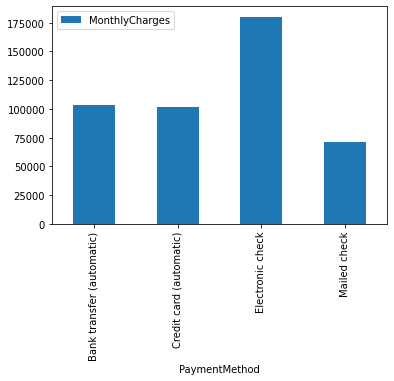

In [ ]:
dfg.plot(x="PaymentMethod", y="MonthlyCharges", kind="bar")

([0, 1, 2, 3], <a list of 4 Text major ticklabel objects>)

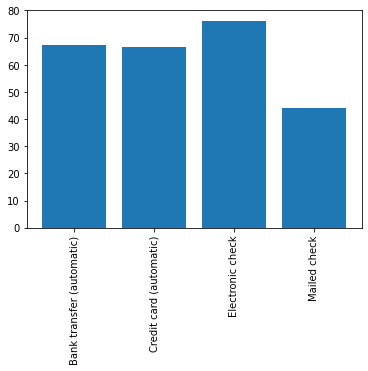

In [17]:
plt.bar(x="PaymentMethod", height="MonthlyCharges", data=dfg)
plt.xticks(rotation = 90)

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

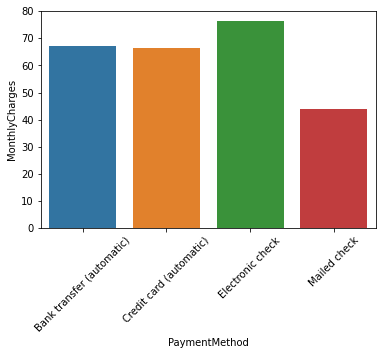

In [18]:
sns.barplot(x="PaymentMethod", y="MonthlyCharges", data=dfg)
plt.xticks(rotation = 45)

Multi-barplot: Mencari rata-rata biaya bulanan untuk setiap metode pembayaran dan berdasarkan churn

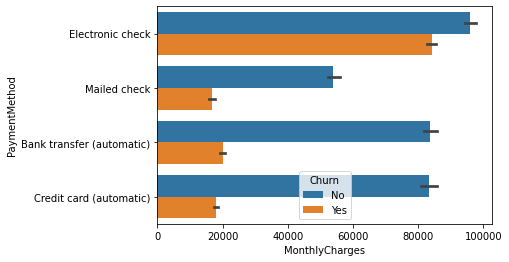

In [19]:
sns.barplot(x="MonthlyCharges", y="PaymentMethod", data=df, estimator=sum, hue="Churn")

In [20]:
dfgc = df.groupby(["PaymentMethod", "Churn"])["MonthlyCharges"].sum().reset_index()

In [ ]:
dfgc

,PaymentMethod,Churn,MonthlyCharges
0,Bank transfer (automatic),No,83653.55
1,Bank transfer (automatic),Yes,20091.90
2,Credit card (automatic),No,83285.25
3,Credit card (automatic),Yes,17946.60
4,Electronic check,No,96056.25
5,Electronic check,Yes,84288.75
6,Mailed check,No,53990.70
7,Mailed check,Yes,16803.60


In [21]:
dfp  = dfgc.pivot_table(index="PaymentMethod", columns="Churn", values="MonthlyCharges")

In [22]:
dfp

Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),83653.55,20091.90
Credit card (automatic),83285.25,17946.60
Electronic check,96056.25,84288.75
Mailed check,53990.70,16803.60


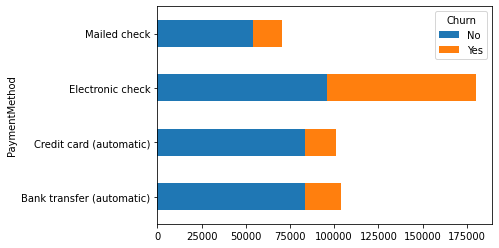

In [23]:
dfp.plot(kind="barh", stacked=True)